# <u>Predicting the <b> gender</b></u> of the passangers on Titanic Ship

<u>Note</u>:<i> The data is completely irrelevant to predicting the gender. We are doing it just for fun ;-)

### Import useful libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

### Import data

In [186]:
df1 = pd.read_csv('train.csv').drop(columns=['Survived'])
df2 = pd.read_csv('test.csv')

### Get rid of stuff (catergorical columns and null values)

In [187]:
data = pd.concat([df1, df2], ignore_index=True)
data.drop(['Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1306
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1045 non-null   int64  
 1   Pclass       1045 non-null   int64  
 2   Sex          1045 non-null   object 
 3   Age          1045 non-null   float64
 4   SibSp        1045 non-null   int64  
 5   Parch        1045 non-null   int64  
 6   Fare         1045 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 65.3+ KB


### Change our <u>target column</u> data type to int, so we can use it in model

In [188]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [189]:
data['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

### Visual Data

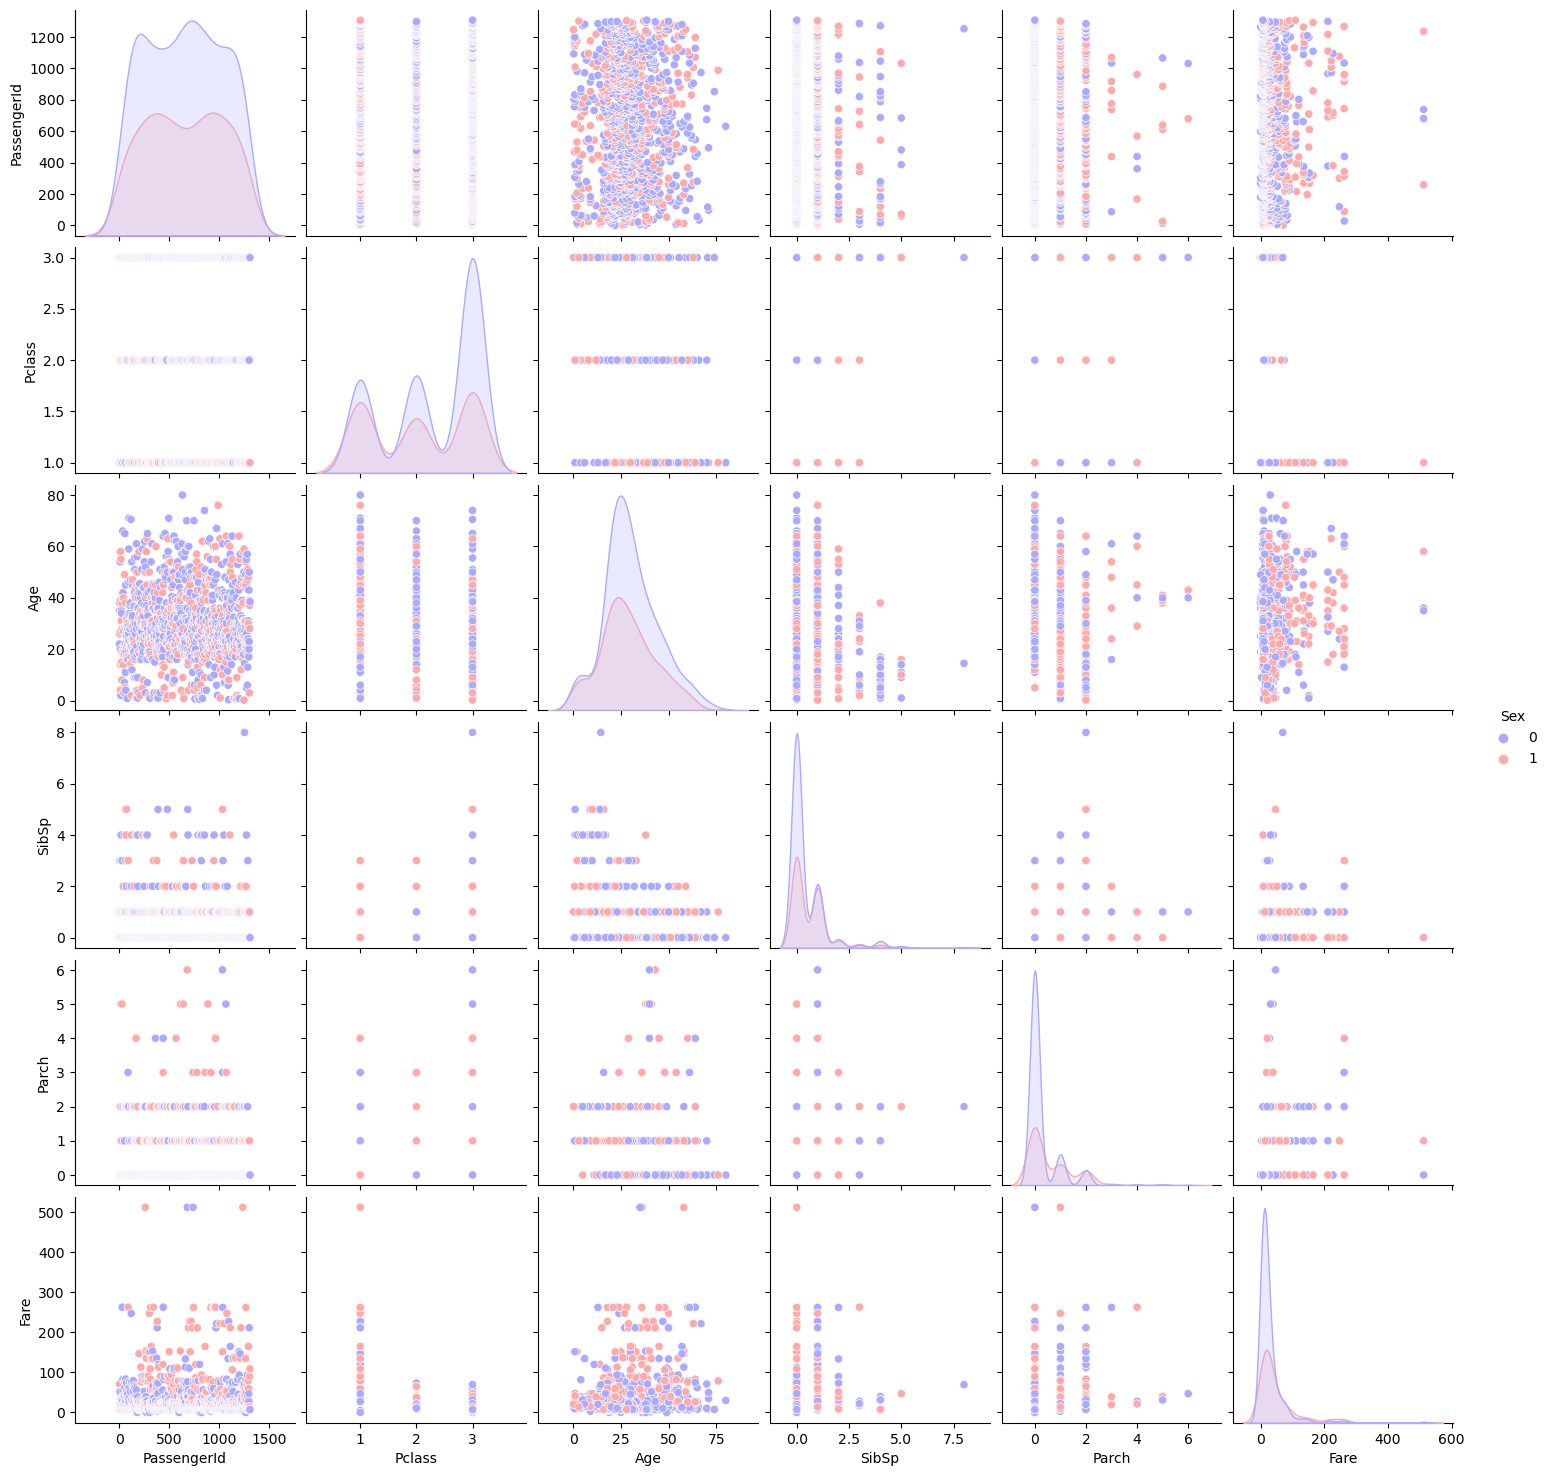

In [190]:
sns.pairplot(data,hue='Sex',palette='bwr')

<AxesSubplot:>

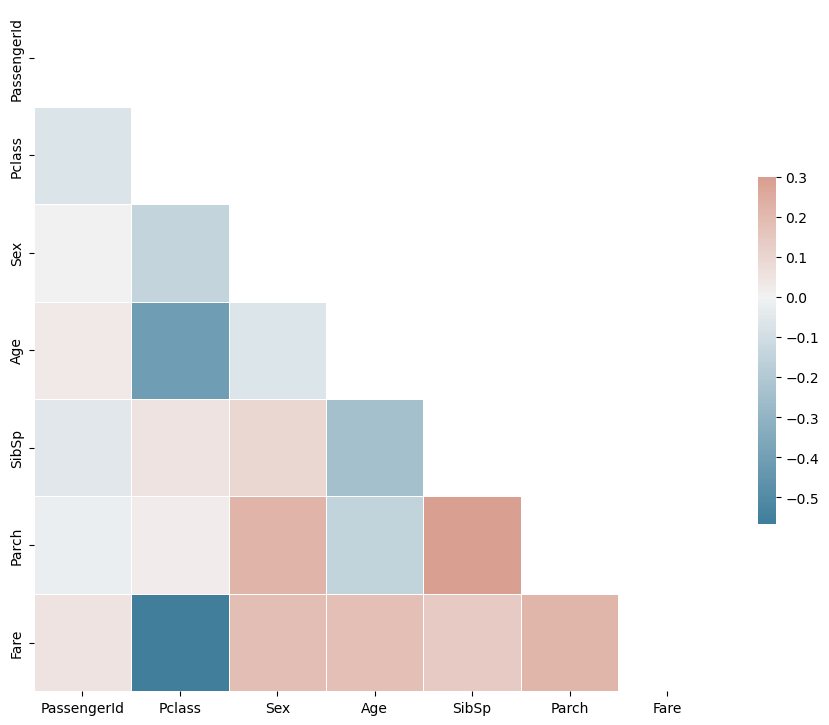

In [209]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Test Train Split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sex',axis=1), 
                                                    data['Sex'], test_size=0.25, 
                                                    random_state=100)

# Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [195]:
predictions = logmodel.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predictions).sum()))

Number of mislabeled points out of a total 262 points : 83


In [196]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       160
           1       0.71      0.31      0.44       102

    accuracy                           0.68       262
   macro avg       0.69      0.62      0.61       262
weighted avg       0.69      0.68      0.65       262



# Naive Bayes

In [197]:
from sklearn.naive_bayes import GaussianNB

In [198]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [199]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 262 points : 82


In [200]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       160
           1       0.68      0.37      0.48       102

    accuracy                           0.69       262
   macro avg       0.68      0.63      0.63       262
weighted avg       0.69      0.69      0.66       262



# K-nearest-neighbour

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

/Users/rjaujla/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [206]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != pred).sum()))

Number of mislabeled points out of a total 262 points : 89


In [207]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       160
           1       0.63      0.30      0.41       102

    accuracy                           0.66       262
   macro avg       0.65      0.60      0.59       262
weighted avg       0.65      0.66      0.62       262



# Decision Tree

In [210]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [212]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predictions).sum()))

Number of mislabeled points out of a total 262 points : 103


In [213]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       160
           1       0.63      0.30      0.41       102

    accuracy                           0.66       262
   macro avg       0.65      0.60      0.59       262
weighted avg       0.65      0.66      0.62       262

